In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('used_cars.csv')

In [4]:
display(df)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [1]:
df.info()

NameError: name 'df' is not defined

In [2]:
df=df.drop(columns=['Unnamed: 0','county','description','image_url','url','region_url','model','lat','long','vin'])
df.head(5)

NameError: name 'df' is not defined

In [7]:
df['state'] = [0 if x == 'va' else 1 for x in df['state']]

X=df.drop('state',1)
y=df.state

In [8]:
print(X['type'].head(5))

0    hatchback
1          NaN
2          NaN
3          NaN
4       pickup
Name: type, dtype: object


In [9]:
X.isnull().sum().sort_values(ascending=False).head

<bound method NDFrame.head of size            13115
condition        9152
cylinders        7085
paint_color      5514
drive            4642
type             3659
odometer         2389
manufacturer      705
transmission      190
title_status      110
fuel               73
year               12
id                  0
region              0
price               0
dtype: int64>

In [10]:
print(pd.get_dummies(X['fuel'].head(15)))

    diesel  gas  other
0        0    1      0
1        0    1      0
2        0    1      0
3        0    1      0
4        1    0      0
5        0    1      0
6        1    0      0
7        0    1      0
8        0    1      0
9        1    0      0
10       0    1      0
11       0    0      1
12       0    1      0
13       0    1      0
14       1    0      0


In [11]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat=len(X[col_name].unique())
        print("feature '{col_name}' has '{unique_cat}' categories".format(col_name=col_name
                                                                          ,unique_cat=unique_cat))

feature 'region' has '17' categories
feature 'manufacturer' has '41' categories
feature 'condition' has '7' categories
feature 'cylinders' has '9' categories
feature 'fuel' has '6' categories
feature 'title_status' has '7' categories
feature 'transmission' has '4' categories
feature 'drive' has '4' categories
feature 'size' has '5' categories
feature 'type' has '14' categories
feature 'paint_color' has '13' categories


In [12]:
todummy_list=['region','manufacturer','condition','cylinders','fuel','title_status'
              ,'transmission','drive','size','type','paint_color']

In [13]:
def dummy_df(df,todummy_list):
    for X in todummy_list:
        dummies = pd.get_dummies(df[X],prefix=X, dummy_na=False)
        df = df.drop(X,1)
        df= pd.concat([df,dummies], axis=1)
    return df

In [14]:
X = dummy_df(X,todummy_list)
X.head(5)

,id,price,year,odometer,region_bellingham,region_charlottesville,region_danville,region_fredericksburg,region_harrisonburg,region_kennewick-pasco-richland,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,7034441763,17899,2012.0,63500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7034440610,0,2016.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7034440588,46463,2015.0,7554.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7034440546,0,2016.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7034406932,49999,2018.0,70150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
X.isnull().sum().sort_values(ascending=False).head

<bound method NDFrame.head of odometer                        2389
year                              12
id                                 0
fuel_gas                           0
drive_4wd                          0
                                ... 
manufacturer_hyundai               0
manufacturer_honda                 0
manufacturer_harley-davidson       0
manufacturer_gmc                   0
paint_color_yellow                 0
Length: 121, dtype: int64>

In [16]:
from sklearn.impute import SimpleImputer 

imp= SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X= pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [17]:
X.isnull().sum().sort_values(ascending=False).head

<bound method NDFrame.head of id                              0
condition_excellent             0
drive_4wd                       0
transmission_other              0
transmission_manual             0
                               ..
manufacturer_honda              0
manufacturer_harley-davidson    0
manufacturer_gmc                0
manufacturer_ford               0
paint_color_yellow              0
Length: 121, dtype: int64>

In [18]:
#outlier detection via turkey IQR

def find_outliers_turkey(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr = q3-q1
    floor = q1 - (0.15*iqr)
    ceiling = q3 + (0.15*iqr)
    outliers_indices= list(x.index[(x<floor)|(x>ceiling)])
    outliers_values = list(x[outliers_indices])
    
    return outliers_indices,outliers_values

In [19]:
turkey_indices,turkey_values=find_outliers_turkey(X['id'])
print(np.sort(turkey_values))

[7.03259745e+09 7.03260471e+09 7.03261255e+09 ... 7.05009672e+09
 7.05009924e+09 7.05010062e+09]


In [20]:
def plot_histogram(x):
    plt.hist(x, color='gray' , alpha=0.5)
    plt.title('test')
    plt.xlabel('value')
    plt.ylabel('freq')
    plt.show()

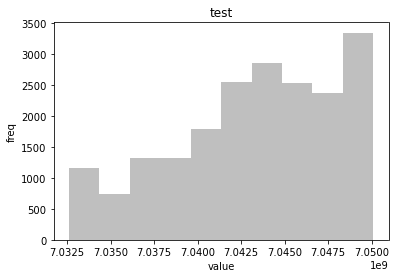

In [21]:
plot_histogram(X['id'])

In [22]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title('test')
    plt.xlabel('value')
    plt.ylabel('freq')
    plt.show()

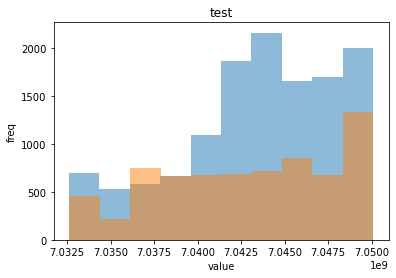

In [23]:
plot_histogram_dv(X['id'],y)

In [24]:
#feature engineering

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interaction(df):
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only = True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis = 1)
    return df

In [25]:
X = add_interaction(X)
print(X.head(5))

             id    price    year  odometer  region_bellingham  \
0  7.034442e+09  17899.0  2012.0   63500.0                0.0   
1  7.034441e+09      0.0  2016.0      10.0                0.0   
2  7.034441e+09  46463.0  2015.0    7554.0                0.0   
3  7.034441e+09      0.0  2016.0      10.0                0.0   
4  7.034407e+09  49999.0  2018.0   70150.0                0.0   

   region_charlottesville  region_danville  region_fredericksburg  \
0                     0.0              0.0                    0.0   
1                     0.0              0.0                    0.0   
2                     0.0              0.0                    0.0   
3                     0.0              0.0                    0.0   
4                     0.0              0.0                    0.0   

   region_harrisonburg  region_kennewick-pasco-richland  ...  \
0                  0.0                              0.0  ...   
1                  0.0                              0.0  ...   
2 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, random_state=1)

In [27]:
print(df.shape)
print(X.shape)

(20001, 16)
(20001, 4661)


In [28]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected= selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/home/baniraaisu/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11  131  250  367  484  649  663  702  718  805  818  847  852  862
  903  911  955 1038 1071 1080 1084 1206 1207 1208 1209 1210 1211 1212
 1213 1226 1231 1234 1239 1250 1271 1287 1387 1399 1419 1523 1526 1539
 1553 1571 1577 1581 1586 1588 1589 1608 1627 1635 1642 1648 1652 1656
 1672 1709 1720 1757 1783 1828 1843 1891 1895 1906 1907 1916 1919 1930
 1934 1968 2003 2012 2017 2027 2031 2057 2104 2185 2199 2259 2278 2283
 2284 2296 2323 2398 2421 2422 2445 2447 2460 2467 2468 2469 2473 2476
 2478 2480 2483 2485 2543 2553 2585 2588 2593 2639 2642 2676 2771 2787
 2797 2814 2852 2924 2927 2962 2995 3010 3031 3061 3062 3070 3096 3134
 3153 3163 3170 3171 3178 3247 3252 3283 3363 3379 3396 3564 3633 3635
 3644 3657 3670 3674 3683 3709 3795 3815 3867 3907 3924 4037 4048 4092
 4163 4168 4172 4182 4185 4188 4189 4190 4193 4213 4221 4237 4421 4519
 4567 4587 4597

In [29]:
colnames_selected


['region_bellingham',
 'region_richmond',
 'region_vermont',
 'id_region_bellingham',
 'id_region_richmond',
 'id_region_vermont',
 'price_region_bellingham',
 'year_region_bellingham',
 'year_region_vermont',
 'odometer_region_bellingham',
 'odometer_region_vermont',
 'region_bellingham_fuel_gas',
 'region_bellingham_title_status_clean',
 'region_bellingham_transmission_automatic',
 'region_bellingham_drive_4wd',
 'region_vermont_condition_excellent',
 'region_vermont_fuel_gas',
 'region_vermont_title_status_clean',
 'region_vermont_transmission_automatic',
 'region_vermont_drive_4wd']

In [30]:
df.to_csv('Classification.csv')

In [31]:
#Classification Modelling using Logistic Regression and Support Vector Machine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.svm import SVC

def find_model_pref(X_train,y_train,X_test,y_test):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test,y_hat)
    return auc



In [32]:
auc_processed = find_model_pref(X_train_selected,y_train,X_test_selected,y_test)

vecmach = SVC()
vecmach.fit(X_train_selected,y_train)

SVC()

In [36]:
predict=vecmach.predict(X_test_selected)

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
print('SVM Reports with Confusion Matrix')
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))





SVM Reports with Confusion Matrix
[[3854    0]
 [ 344 1803]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3854
           1       1.00      0.84      0.91      2147

    accuracy                           0.94      6001
   macro avg       0.96      0.92      0.94      6001
weighted avg       0.95      0.94      0.94      6001



In [38]:
print('Logistic Regression Accuracy')
print(auc_processed)

Logistic Regression Accuracy
0.9381389027399475


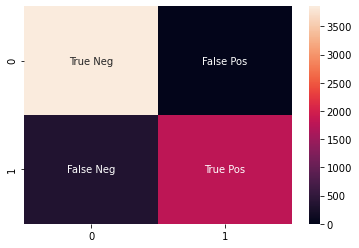

In [45]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
conf_svc = confusion_matrix(y_test,predict)
ax = sns.heatmap(conf_svc, annot=labels, fmt="")

In [46]:
#Accuracy between processed and unprocessed data
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis = 0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(20001, 16)
(4353, 16)


In [47]:
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed = df_unprocessed.drop(col_name,1)


In [48]:
#splitting unprocessed data to features and outcomes

X_unprocessed = df_unprocessed.drop('state',1)
y_unprocessed = df_unprocessed.state

In [49]:
X_unprocessed.head(5)

,id,price,year,odometer
0,7034441763,17899,2012.0,63500.0
24,7034278551,4600,2008.0,110982.0
48,7033720842,28000,2004.0,67348.0
57,7033598937,2500,2004.0,129000.0
109,7050078672,12000,2015.0,65000.0


In [50]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X_unprocessed,y_unprocessed, train_size = 0.70, random_state=1)
auc_unprocessed = find_model_pref(X_train_unprocessed,y_train, X_test_unprocessed , y_test)

vecmach_unprocessed = SVC()
vecmach_unprocessed.fit(X_train_unprocessed,y_train)

SVC()

In [51]:

predict_unprocessed=vecmach_unprocessed.predict(X_test_unprocessed)

In [52]:
print('SVM accuracy with raw data')
print('\n')
print(confusion_matrix(y_test,predict_unprocessed))
print('\n')
print(classification_report(y_test,predict_unprocessed))


SVM accuracy with raw data


[[825   0]
 [481   0]]


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       825
           1       0.00      0.00      0.00       481

    accuracy                           0.63      1306
   macro avg       0.32      0.50      0.39      1306
weighted avg       0.40      0.63      0.49      1306



/home/baniraaisu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baniraaisu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baniraaisu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print('Logistic linear with raw data')
print(auc_unprocessed)

Logistic linear with raw data
0.5436603036603037


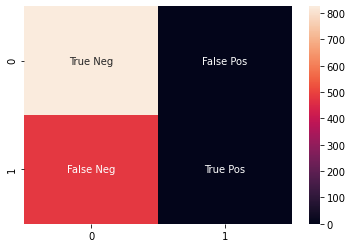

In [54]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
conf_svc_unprocessed = confusion_matrix(y_test,predict_unprocessed)
ax = sns.heatmap(conf_svc_unprocessed, annot=labels, fmt="")